# Nifi 1.14.0

Nifi 1.14.0

# Load Class Metrics Data

In [1]:
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics

class_metrics_data=pd.read_csv('./Metrics/nifi-1.14.0/nifi-1.14.0.csv', sep=';')
#print(len(class_metrics_data.dropna()))
class_metrics_data

,Class Name,ATFD,CBO,DAC,DIT,LCOM,MPC,NCSS,NOAC,NOAM,...,SIZE2,NOC,NOM,NOO,NOOM,NOPA,RFC,TCC,WOC,WMC
0,com.hortonworks.registries.schemaregistry.clie...,0.0,6.0,13.0,1.0,6.0,8.0,491.0,1.0,67.0,...,166.0,1.0,75.0,139.0,6.0,0.0,254.0,0.1168,0.9863,175.0
1,com.hortonworks.registries.schemaregistry.clie...,0.0,3.0,3.0,1.0,2.0,62.0,33.0,0.0,5.0,...,39.0,NaN,6.0,18.0,0.0,0.0,33.0,0.4000,1.0000,13.0
2,com.hortonworks.registries.schemaregistry.clie...,0.0,1.0,1.0,1.0,0.0,8.0,15.0,0.0,0.0,...,17.0,0.0,3.0,15.0,2.0,0.0,9.0,0.0000,0.0000,9.0
3,com.hortonworks.registries.schemaregistry.clie...,1.0,1.0,1.0,1.0,0.0,9.0,10.0,0.0,0.0,...,23.0,0.0,1.0,13.0,0.0,0.0,2.0,0.0000,0.0000,1.0
4,org.apache.hadoop.hive.ql.io.orc.NiFiOrcUtils,13.0,14.0,1.0,1.0,3.0,273.0,336.0,0.0,11.0,...,24.0,0.0,11.0,23.0,0.0,0.0,125.0,0.0545,1.0000,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6312,org.wali.SerDeFactory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,org.wali.SingletonSerDeFactory,0.0,4.0,1.0,1.0,1.0,3.0,5.0,0.0,4.0,...,22.0,0.0,5.0,21.0,0.0,0.0,8.0,1.0000,1.0000,5.0
6314,org.wali.SyncListener,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6315,org.wali.UpdateType,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation Matrix of Class Metrics

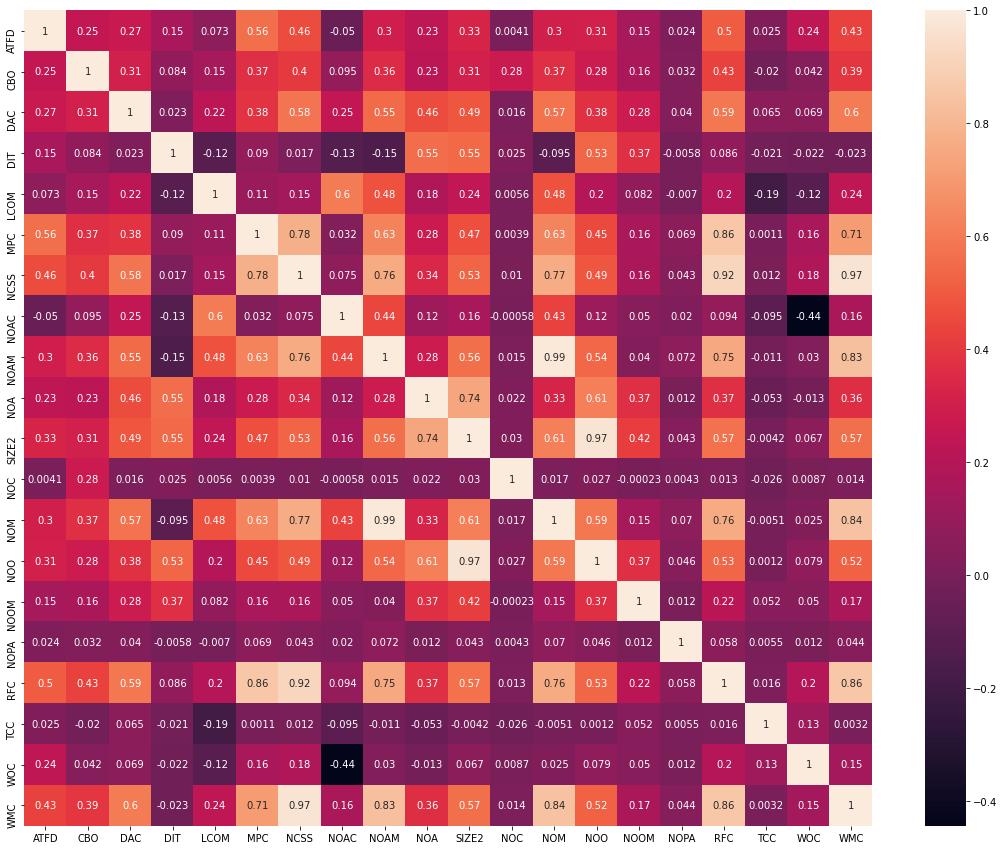

In [2]:
f = plt.figure(figsize=(19, 15))

corr_matrix = class_metrics_data.corr()

sn.heatmap(corr_matrix, annot=True)

#plt.title('Correlation Matrix of Class Metrics', fontsize=16, c='#D05525',weight='bold');
plt.savefig('Correlation_Matrix_of_Class_Metrics_1_14_0.png')

# Statistical Threshold Values

In [3]:
def make_hist(ax, x, bins=None, binlabels=None, width=0.85, extra_x=1, extra_y=4, 
              text_offset=0.3, title=r"Frequency diagram", 
              xlabel="Values", ylabel="Frequency"):
    if bins is None:
        xmax = max(x)+extra_x
        bins = range(xmax+1)
    if binlabels is None:
        if np.issubdtype(np.asarray(x).dtype, np.integer):
            binlabels = [str(bins[i]) if bins[i+1]-bins[i] == 1 else 
                         '{}-{}'.format(bins[i], bins[i+1]-1)
                         for i in range(len(bins)-1)]
        else:
            binlabels = [str(bins[i]) if bins[i+1]-bins[i] == 1 else 
                         '{}-{}'.format(*bins[i:i+2])
                         for i in range(len(bins)-1)]
        if bins[-1] == np.inf:
            binlabels[-1] = '{}+'.format(bins[-2])
    n, bins = np.histogram(x, bins=bins)
    patches = ax.bar(range(len(n)), n, align='center', width=width, color = '#7AACE1')
    ymax = max(n)+extra_y

    ax.set_xticks(range(len(binlabels)))
    ax.set_xticklabels(binlabels)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, ymax)
    ax.grid(True, axis='y')
    # http://stackoverflow.com/a/28720127/190597 (peeol)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # http://stackoverflow.com/a/11417222/190597 (gcalmettes)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    autolabel(patches, text_offset)

def autolabel(rects, shift=0.3):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            plt.text(rect.get_x()+rect.get_width()/2., height+shift, '%d'%int(height),
                     ha='center', va='bottom')

In [4]:
def ratio_scale_statistical_values(l):
    avg = statistics.mean(l)
    stdev = statistics.stdev(l)
    low = avg - stdev
    high = avg + stdev
    very_high = (avg + stdev)*1.5
    return low,avg,high,very_high
    
def ordinal_scale_statistical_values(l):    
    lower_quartile = np.percentile(l, 25)
    median = np.percentile(l, 50)
    upper_quartile = np.percentile(l, 75)
    IQR = upper_quartile - lower_quartile
    lower_tail = lower_quartile - (1.5*IQR)
    upper_tail = upper_quartile + (1.5*IQR)
    return lower_tail, lower_quartile, median, upper_quartile, upper_tail

shallow_value = 2 #1-2
few_value = 5 #2-5
short_memory_capacity_value = 7 #7-8
many_value = 10

quarter_value = 0.25
one_third_value = 0.33
half_value = 0.5

In [5]:
""" # *************** Statistical Values to Excel ****************
df = pd.DataFrame(columns=['Name', '1', '2', '3', '4', '5'])
for i in range(20):
    lower_tail, lower_quartile, median, upper_quartile, upper_tail = ordinal_scale_statistical_values(class_metrics_data.dropna().iloc[:, i+1].to_list())
    df.loc[i] = class_metrics_data.columns[i+1]
    a_list = [round(lower_tail, 2), round(lower_quartile, 2), round(median, 2), round(upper_quartile, 2), round(upper_tail, 2)]
    df.loc[i] = [str(i)] + a_list
df.to_excel('a.xlsx')

df = pd.DataFrame(columns=['Name', '1', '2', '3', '4'])
for i in range(20):
    low,avg,high,very_high = ratio_scale_statistical_values(class_metrics_data.dropna().iloc[:, i+1].to_list())
    df.loc[i] = class_metrics_data.columns[i+1]
    a_list = [round(low, 2), round(avg, 2), round(high, 2), round(very_high, 2)]
    df.loc[i] = [str(i)] + a_list
df.to_excel('b.xlsx')
"""
print('If you want statistical values to excel, remove comments line!')

If you want statistical values to excel, remove comments line!


In [6]:
print('\033[1mRatio Scale Statistical Values')
print('\t  Lower Tail\t Lower Quartile\t Median\t\t Upper Quartile\t Upper Tail\033[0m')
for i in range(20):
    lower_tail, lower_quartile, median, upper_quartile, upper_tail = ordinal_scale_statistical_values(class_metrics_data.dropna().iloc[:, i+1].to_list())
    print(class_metrics_data.columns[i+1]," \t: ->", round(lower_tail, 2)," \t ->", round(lower_quartile, 2)," \t ->", round(median, 2)," \t ->", round(upper_quartile, 2)," \t ->", round(upper_tail, 2))

print('\n\033[1mOrdinal Scale Statistical Values')
print('\t  Low\t\t Avarage\t High\t\t Very High\033[0m')
for i in range(20):
    low,avg,high,very_high = ratio_scale_statistical_values(class_metrics_data.dropna().iloc[:, i+1].to_list())
    print(class_metrics_data.columns[i+1]," \t: ->", round(low, 2)," \t ->", round(avg, 2)," \t ->", round(high, 2)," \t ->", round(very_high, 2))

Ratio Scale Statistical Values
	  Lower Tail	 Lower Quartile	 Median		 Upper Quartile	 Upper Tail
ATFD  	: -> -3.0  	 -> 0.0  	 -> 1.0  	 -> 2.0  	 -> 5.0
CBO  	: -> -12.0  	 -> 3.0  	 -> 7.0  	 -> 13.0  	 -> 28.0
DAC  	: -> -2.0  	 -> 1.0  	 -> 1.0  	 -> 3.0  	 -> 6.0
DIT  	: -> -2.0  	 -> 1.0  	 -> 1.0  	 -> 3.0  	 -> 6.0
LCOM  	: -> -2.0  	 -> 1.0  	 -> 1.0  	 -> 3.0  	 -> 6.0
MPC  	: -> -41.5  	 -> 2.0  	 -> 9.0  	 -> 31.0  	 -> 74.5
NCSS  	: -> -54.0  	 -> 6.0  	 -> 17.0  	 -> 46.0  	 -> 106.0
NOAC  	: -> -3.0  	 -> 0.0  	 -> 0.0  	 -> 2.0  	 -> 5.0
NOAM  	: -> -6.5  	 -> 1.0  	 -> 3.0  	 -> 6.0  	 -> 13.5
NOA  	: -> -14.5  	 -> 2.0  	 -> 5.0  	 -> 13.0  	 -> 29.5
SIZE2  	: -> -34.0  	 -> 20.0  	 -> 28.0  	 -> 56.0  	 -> 110.0
NOC  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
NOM  	: -> -7.0  	 -> 2.0  	 -> 4.0  	 -> 8.0  	 -> 17.0
NOO  	: -> -29.5  	 -> 17.0  	 -> 24.0  	 -> 48.0  	 -> 94.5
NOOM  	: -> -1.5  	 -> 0.0  	 -> 0.0  	 -> 1.0  	 -> 2.5
NOPA  	: -> 0.0  	 -> 0.0  	

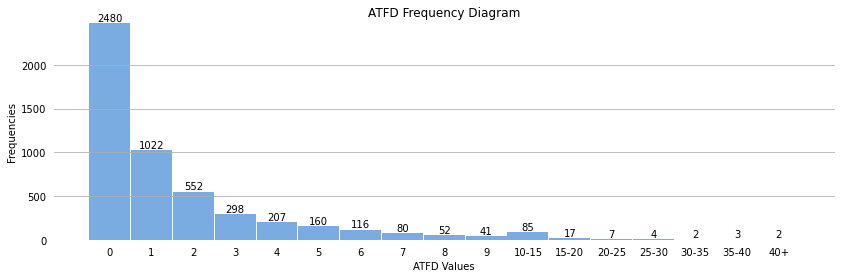

In [7]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          class_metrics_data[['ATFD']].dropna().sort_values(by='ATFD'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"ATFD Frequency Diagram", 
          xlabel="ATFD Values", ylabel="Frequencies"
         )
plt.show()

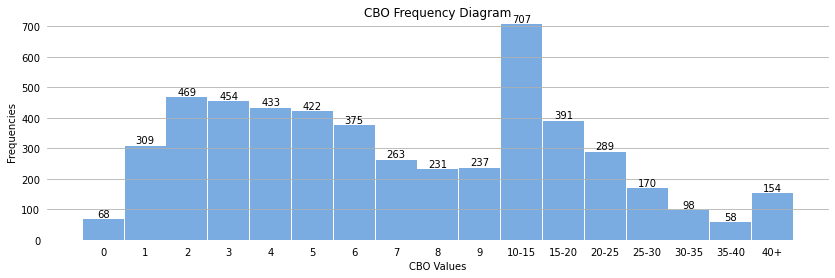

In [8]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          class_metrics_data[['CBO']].dropna().sort_values(by='CBO'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"CBO Frequency Diagram", 
          xlabel="CBO Values", ylabel="Frequencies"
         )
plt.show()

# Load Method Metrics Data

In [9]:
import xml.etree.ElementTree as ET

tree = ET.parse('./Metrics/nifi-1.14.0/nifi-1.14.0.xml')
root = tree.getroot()

def load_method_metrics(node, class_list):
    node_attr = node.attrib
    
    for class_node in node.iter('Class'):
        if class_node.attrib['name'] in class_list:
            for doc in class_node.iter('Method'):
                doc_dict = node_attr.copy()
                doc_dict.update(doc.attrib)

                doc_dict['Class Name'] = class_node.attrib['name']
                doc_dict['CND'] = doc[0][0].attrib['value']
                doc_dict['CDISP'] = doc[0][1].attrib['value']
                doc_dict['CINT'] = doc[0][2].attrib['value']
                doc_dict['FDP'] = doc[0][3].attrib['value']
                doc_dict['LOC'] = doc[0][4].attrib['value']
                doc_dict['LAA'] = doc[0][5].attrib['value']
                doc_dict['LND'] = doc[0][6].attrib['value']
                doc_dict['MND'] = doc[0][7].attrib['value']
                doc_dict['CC'] = doc[0][8].attrib['value']
                doc_dict['NOAV'] = doc[0][9].attrib['value']
                doc_dict['NOL'] = doc[0][10].attrib['value']
                doc_dict['NOPM'] = doc[0][11].attrib['value']
                
                yield doc_dict

In [10]:
label_class = class_metrics_data.dropna()['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label_class]

In [11]:
labels = label_filtered
method_metrics_data = pd.DataFrame(list(load_method_metrics(tree.getroot(), labels)))
method_metrics_data = method_metrics_data.rename(columns = {'name':'Method Name'})
method_metrics_data

,Method Name,Class Name,CND,CDISP,CINT,FDP,LOC,LAA,LND,MND,CC,NOAV,NOL,NOPM
0,"Configuration(Map<String, ?>)",SchemaRegistryClient,0,0.6,3,0,5,1.0,0,0,1,4,0,1
1,"buildConfig(Map<String, ?>)",SchemaRegistryClient,2,0.5,8,0,17,1.0,1,3,4,7,1,1
2,buildOptions(Field[]),SchemaRegistryClient,1,0.6667,6,0,16,0.0,1,3,4,6,1,1
3,getAvailableConfigEntries(),SchemaRegistryClient,0,1.0,1,0,3,1.0,0,0,1,1,0,0
4,getConfig(),SchemaRegistryClient,0,1.0,1,0,3,1.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38745,SingletonSerDeFactory(SerDe<T>),SingletonSerDeFactory,0,0.0,0,0,3,1.0,0,0,1,2,0,1
38746,createSerDe(String),SingletonSerDeFactory,0,0.0,0,0,4,1.0,0,0,1,1,0,1
38747,getLocation(T),SingletonSerDeFactory,0,1.0,1,0,4,1.0,0,0,1,2,0,1
38748,getRecordIdentifier(T),SingletonSerDeFactory,0,1.0,1,0,4,1.0,0,0,1,2,0,1


In [12]:
method_metrics_data = method_metrics_data.replace('N/A',0)

for i in method_metrics_data.columns:
    try:
        method_metrics_data[[i]] = method_metrics_data[[i]].astype(float)
    except:
        pass

method_metrics_data

,Method Name,Class Name,CND,CDISP,CINT,FDP,LOC,LAA,LND,MND,CC,NOAV,NOL,NOPM
0,"Configuration(Map<String, ?>)",SchemaRegistryClient,0.0,0.6000,3.0,0.0,5.0,1.0,0.0,0.0,1.0,4.0,0.0,1.0
1,"buildConfig(Map<String, ?>)",SchemaRegistryClient,2.0,0.5000,8.0,0.0,17.0,1.0,1.0,3.0,4.0,7.0,1.0,1.0
2,buildOptions(Field[]),SchemaRegistryClient,1.0,0.6667,6.0,0.0,16.0,0.0,1.0,3.0,4.0,6.0,1.0,1.0
3,getAvailableConfigEntries(),SchemaRegistryClient,0.0,1.0000,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,getConfig(),SchemaRegistryClient,0.0,1.0000,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38745,SingletonSerDeFactory(SerDe<T>),SingletonSerDeFactory,0.0,0.0000,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0
38746,createSerDe(String),SingletonSerDeFactory,0.0,0.0000,0.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
38747,getLocation(T),SingletonSerDeFactory,0.0,1.0000,1.0,0.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0
38748,getRecordIdentifier(T),SingletonSerDeFactory,0.0,1.0000,1.0,0.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0


# Correlation Matrix of Method Metrics

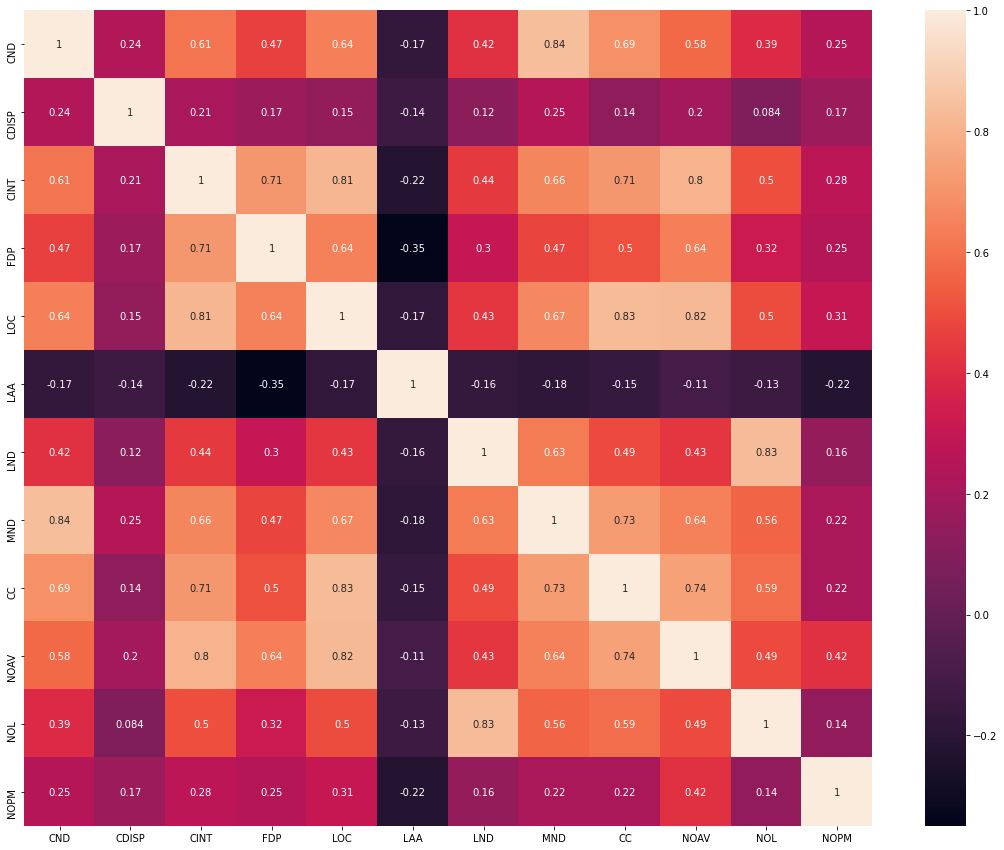

In [13]:
f = plt.figure(figsize=(19, 15))
corr_matrix = method_metrics_data[['CND','CDISP','CINT','FDP','LOC','LAA','LND','MND','CC','NOAV','NOL','NOPM']].corr()

sn.heatmap(corr_matrix, annot=True)

#plt.title('Correlation Matrix of Method Metrics', fontsize=16, c='#D05525',weight='bold');
plt.savefig('Correlation_Matrix_of_Method_Metrics_1_14_0.png')

# Statistical Threshold Values

In [14]:
def ratio_scale_statistical_values(l):
    avg = statistics.mean(l)
    stdev = statistics.stdev(l)
    low = avg - stdev
    high = avg + stdev
    very_high = (avg + stdev)*1.5
    return low,avg,high,very_high
    
def ordinal_scale_statistical_values(l):    
    lower_quartile = np.percentile(l, 25)
    median = np.percentile(l, 50)
    upper_quartile = np.percentile(l, 75)
    IQR = upper_quartile - lower_quartile
    lower_tail = lower_quartile - (1.5*IQR)
    upper_tail = upper_quartile + (1.5*IQR)
    return lower_tail, lower_quartile, median, upper_quartile, upper_tail

shallow_value = 2 #1-2
few_value = 5 #2-5
short_memory_capacity_value = 7 #7-8
many_value = 10

quarter_value = 0.25
one_third_value = 0.33
half_value = 0.5

In [15]:
""" # *************** Statistical Values to Excel ****************
df = pd.DataFrame(columns=['Name', '1', '2', '3', '4', '5'])
for i in range(12):
    lower_tail, lower_quartile, median, upper_quartile, upper_tail = ordinal_scale_statistical_values(method_metrics_statistics_data.dropna().iloc[:, i].to_list())
    df.loc[i] = method_metrics_statistics_data.columns[i]
    a_list = [round(lower_tail, 2), round(lower_quartile, 2), round(median, 2), round(upper_quartile, 2), round(upper_tail, 2)]
    df.loc[i] = [str(i)] + a_list
df.to_excel('c.xlsx')
df = pd.DataFrame(columns=['Name', '1', '2', '3', '4'])
for i in range(12):
    low,avg,high,very_high = ratio_scale_statistical_values(method_metrics_statistics_data.dropna().iloc[:, i].to_list())
    df.loc[i] = method_metrics_statistics_data.columns[i]
    a_list = [round(low, 2), round(avg, 2), round(high, 2), round(very_high, 2)]
    df.loc[i] = [str(i)] + a_list
df.to_excel('d.xlsx')
"""
print('If you want statistical values to excel, remove comments line!')

If you want statistical values to excel, remove comments line!


In [16]:
method_metrics_statistics_data = method_metrics_data[['CND','CDISP','CINT','FDP','LOC','LAA','LND','MND','CC','NOAV','NOL','NOPM']]

print('\033[1mRatio Scale Statistical Values')
print('\t  Lower Tail\t Lower Quartile\t Median\t\t Upper Quartile\t Upper Tail\033[0m')
for i in range(12):
    lower_tail, lower_quartile, median, upper_quartile, upper_tail = ordinal_scale_statistical_values(method_metrics_statistics_data.dropna().iloc[:, i].to_list())
    print(method_metrics_statistics_data.columns[i]," \t: ->", round(lower_tail, 2)," \t ->", round(lower_quartile, 2)," \t ->", round(median, 2)," \t ->", round(upper_quartile, 2)," \t ->", round(upper_tail, 2))

print('\n\033[1mOrdinal Scale Statistical Values')
print('\t  Low\t\t Avarage\t High\t\t Very High\033[0m')
for i in range(12):
    low,avg,high,very_high = ratio_scale_statistical_values(method_metrics_statistics_data.dropna().iloc[:, i].to_list())
    print(method_metrics_statistics_data.columns[i]," \t: ->", round(low, 2)," \t ->", round(avg, 2)," \t ->", round(high, 2)," \t ->", round(very_high, 2))

Ratio Scale Statistical Values
	  Lower Tail	 Lower Quartile	 Median		 Upper Quartile	 Upper Tail
CND  	: -> -1.5  	 -> 0.0  	 -> 0.0  	 -> 1.0  	 -> 2.5
CDISP  	: -> -1.2  	 -> 0.0  	 -> 0.4  	 -> 0.8  	 -> 2.0
CINT  	: -> -4.5  	 -> 0.0  	 -> 1.0  	 -> 3.0  	 -> 7.5
FDP  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
LOC  	: -> -9.0  	 -> 3.0  	 -> 4.0  	 -> 11.0  	 -> 23.0
LAA  	: -> -1.5  	 -> 0.0  	 -> 1.0  	 -> 1.0  	 -> 2.5
LND  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
MND  	: -> -1.5  	 -> 0.0  	 -> 0.0  	 -> 1.0  	 -> 2.5
CC  	: -> -0.5  	 -> 1.0  	 -> 1.0  	 -> 2.0  	 -> 3.5
NOAV  	: -> -5.0  	 -> 1.0  	 -> 2.0  	 -> 5.0  	 -> 11.0
NOL  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
NOPM  	: -> -1.5  	 -> 0.0  	 -> 1.0  	 -> 1.0  	 -> 2.5

Ordinal Scale Statistical Values
	  Low		 Avarage	 High		 Very High
CND  	: -> -0.31  	 -> 0.32  	 -> 0.96  	 -> 1.44
CDISP  	: -> -0.0  	 -> 0.41  	 -> 0.83  	 -> 1.24
CINT  	: -> -3.18  	 -> 3.06  	 -> 9.3  	 -> 13.95
FDP  

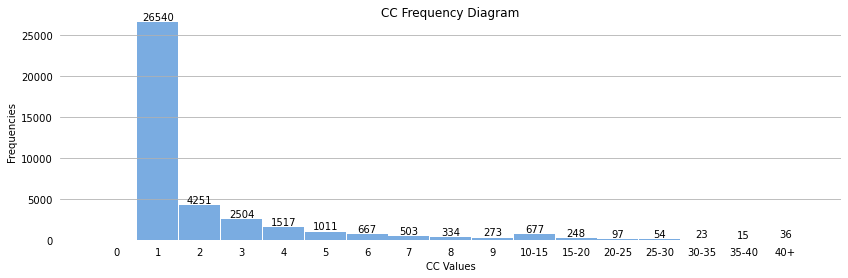

In [17]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          method_metrics_data[['CC']].dropna().sort_values(by='CC'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"CC Frequency Diagram", 
          xlabel="CC Values", ylabel="Frequencies"
         )
plt.show()

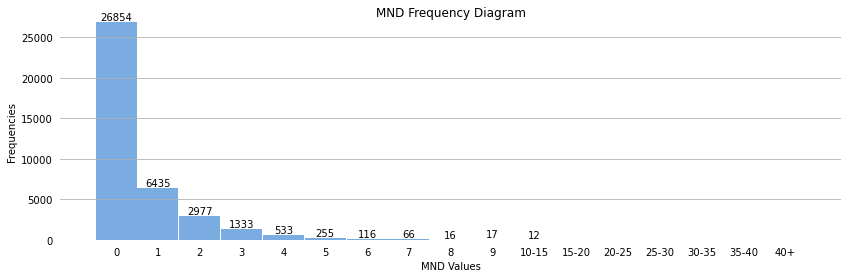

In [18]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          method_metrics_data[['MND']].dropna().sort_values(by='MND'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"MND Frequency Diagram", 
          xlabel="MND Values", ylabel="Frequencies"
         )
plt.show()

# Nifi 1.15.2

Nifi 1.15.2

# Load Class Metrics Data

In [19]:
class_metrics_data=pd.read_csv('./Metrics/nifi-1.15.2/nifi-1.15.2.csv', sep=';')
selected_class_metrics_data = pd.read_excel('./Metrics/nifi-1.15.2/nifi-1.15.2.nifi-web-api.xlsx')
#print(len(selected_class_metrics_data))
class_metrics_data = class_metrics_data.loc[class_metrics_data['Class Name'].isin(list(set(list(selected_class_metrics_data['Class Name']))))]
class_metrics_data

,Class Name,ATFD,CBO,DAC,DIT,LCOM,MPC,NCSS,NOAC,NOAM,...,SIZE2,NOC,NOM,NOO,NOOM,NOPA,RFC,TCC,WOC,WMC
160,org.apache.nifi.aop.MethodProfiler,0.0,0.0,1.0,1.0,1.0,8.0,9.0,0.0,1.0,...,14.0,0.0,1.0,13.0,0.0,0.0,8.0,0.0000,1.0000,2.0
364,org.apache.nifi.audit.AccessPolicyAuditor,8.0,14.0,2.0,2.0,1.0,63.0,79.0,0.0,7.0,...,33.0,0.0,7.0,27.0,0.0,0.0,46.0,0.1905,1.0000,20.0
365,org.apache.nifi.audit.ComponentStateAuditor,5.0,14.0,1.0,2.0,1.0,51.0,54.0,0.0,3.0,...,27.0,0.0,3.0,23.0,0.0,0.0,28.0,1.0000,1.0000,6.0
366,org.apache.nifi.audit.ControllerAuditor,4.0,9.0,1.0,2.0,1.0,37.0,44.0,0.0,2.0,...,26.0,0.0,2.0,22.0,0.0,0.0,23.0,1.0000,1.0000,6.0
367,org.apache.nifi.audit.ControllerServiceAuditor,11.0,25.0,2.0,2.0,1.0,151.0,194.0,0.0,10.0,...,38.0,0.0,10.0,30.0,0.0,0.0,66.0,0.2222,1.0000,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,org.apache.nifi.web.util.InvalidComponentAction,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6424,org.apache.nifi.web.util.LifecycleManagementEx...,0.0,5.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,...,52.0,0.0,3.0,46.0,0.0,0.0,6.0,0.0000,0.0000,3.0
6425,org.apache.nifi.web.util.LocalComponentLifecycle,16.0,26.0,4.0,1.0,2.0,225.0,229.0,3.0,21.0,...,39.0,0.0,21.0,35.0,0.0,0.0,90.0,0.3381,0.8571,76.0
6427,org.apache.nifi.web.util.Pause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation Matrix of Class Metrics

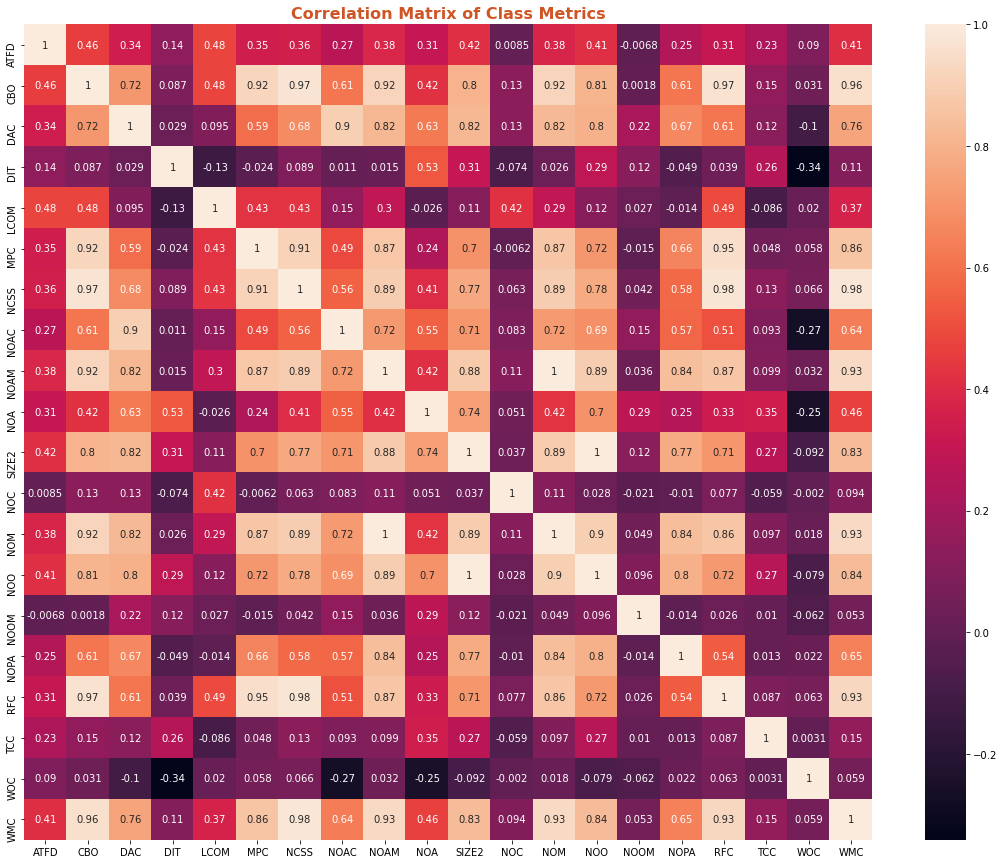

In [20]:
f = plt.figure(figsize=(19, 15))

corr_matrix = class_metrics_data.corr()

sn.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix of Class Metrics', fontsize=16, c='#D05525',weight='bold');
plt.show()

# Statistical Threshold Values

In [21]:
def make_hist(ax, x, bins=None, binlabels=None, width=0.85, extra_x=1, extra_y=4, 
              text_offset=0.3, title=r"Frequency diagram", 
              xlabel="Values", ylabel="Frequency"):
    if bins is None:
        xmax = max(x)+extra_x
        bins = range(xmax+1)
    if binlabels is None:
        if np.issubdtype(np.asarray(x).dtype, np.integer):
            binlabels = [str(bins[i]) if bins[i+1]-bins[i] == 1 else 
                         '{}-{}'.format(bins[i], bins[i+1]-1)
                         for i in range(len(bins)-1)]
        else:
            binlabels = [str(bins[i]) if bins[i+1]-bins[i] == 1 else 
                         '{}-{}'.format(*bins[i:i+2])
                         for i in range(len(bins)-1)]
        if bins[-1] == np.inf:
            binlabels[-1] = '{}+'.format(bins[-2])
    n, bins = np.histogram(x, bins=bins)
    patches = ax.bar(range(len(n)), n, align='center', width=width, color = '#7AACE1')
    ymax = max(n)+extra_y

    ax.set_xticks(range(len(binlabels)))
    ax.set_xticklabels(binlabels)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, ymax)
    ax.grid(True, axis='y')
    # http://stackoverflow.com/a/28720127/190597 (peeol)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # http://stackoverflow.com/a/11417222/190597 (gcalmettes)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    autolabel(patches, text_offset)

def autolabel(rects, shift=0.3):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            plt.text(rect.get_x()+rect.get_width()/2., height+shift, '%d'%int(height),
                     ha='center', va='bottom')

In [22]:
def ratio_scale_statistical_values(l):
    avg = statistics.mean(l)
    stdev = statistics.stdev(l)
    low = avg - stdev
    high = avg + stdev
    very_high = (avg + stdev)*1.5
    return low,avg,high,very_high
    
def ordinal_scale_statistical_values(l):    
    lower_quartile = np.percentile(l, 25)
    median = np.percentile(l, 50)
    upper_quartile = np.percentile(l, 75)
    IQR = upper_quartile - lower_quartile
    lower_tail = lower_quartile - (1.5*IQR)
    upper_tail = upper_quartile + (1.5*IQR)
    return lower_tail, lower_quartile, median, upper_quartile, upper_tail

shallow_value = 2 #1-2
few_value = 5 #2-5
short_memory_capacity_value = 7 #7-8
many_value = 10

quarter_value = 0.25
one_third_value = 0.33
half_value = 0.5

In [23]:
print('\033[1mRatio Scale Statistical Values')
print('\t  Lower Tail\t Lower Quartile\t Median\t\t Upper Quartile\t Upper Tail\033[0m')
for i in range(20):
    lower_tail, lower_quartile, median, upper_quartile, upper_tail = ordinal_scale_statistical_values(class_metrics_data.dropna().iloc[:, i+1].to_list())
    print(class_metrics_data.columns[i+1]," \t: ->", round(lower_tail, 2)," \t ->", round(lower_quartile, 2)," \t ->", round(median, 2)," \t ->", round(upper_quartile, 2)," \t ->", round(upper_tail, 2))

print('\n\033[1mOrdinal Scale Statistical Values')
print('\t  Low\t\t Avarage\t High\t\t Very High\033[0m')
for i in range(20):
    low,avg,high,very_high = ratio_scale_statistical_values(class_metrics_data.dropna().iloc[:, i+1].to_list())
    print(class_metrics_data.columns[i+1]," \t: ->", round(low, 2)," \t ->", round(avg, 2)," \t ->", round(high, 2)," \t ->", round(very_high, 2))

Ratio Scale Statistical Values
	  Lower Tail	 Lower Quartile	 Median		 Upper Quartile	 Upper Tail
ATFD  	: -> -10.5  	 -> 0.0  	 -> 2.0  	 -> 7.0  	 -> 17.5
CBO  	: -> -24.0  	 -> 3.0  	 -> 6.0  	 -> 21.0  	 -> 48.0
DAC  	: -> -0.5  	 -> 1.0  	 -> 1.0  	 -> 2.0  	 -> 3.5
DIT  	: -> -0.5  	 -> 1.0  	 -> 1.0  	 -> 2.0  	 -> 3.5
LCOM  	: -> 1.0  	 -> 1.0  	 -> 1.0  	 -> 1.0  	 -> 1.0
MPC  	: -> -77.0  	 -> 7.0  	 -> 12.0  	 -> 63.0  	 -> 147.0
NCSS  	: -> -125.5  	 -> 5.0  	 -> 13.0  	 -> 92.0  	 -> 222.5
NOAC  	: -> -3.0  	 -> 0.0  	 -> 0.0  	 -> 2.0  	 -> 5.0
NOAM  	: -> -11.0  	 -> 1.0  	 -> 3.0  	 -> 9.0  	 -> 21.0
NOA  	: -> -15.5  	 -> 1.0  	 -> 3.0  	 -> 12.0  	 -> 28.5
SIZE2  	: -> -44.0  	 -> 16.0  	 -> 22.0  	 -> 56.0  	 -> 116.0
NOC  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
NOM  	: -> -12.5  	 -> 1.0  	 -> 4.0  	 -> 10.0  	 -> 23.5
NOO  	: -> -37.5  	 -> 15.0  	 -> 20.0  	 -> 50.0  	 -> 102.5
NOOM  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
NOPA  	: -> 0.0  	 ->

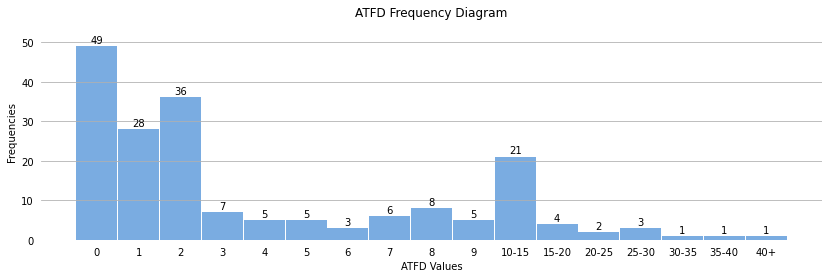

In [24]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          class_metrics_data[['ATFD']].dropna().sort_values(by='ATFD'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"ATFD Frequency Diagram", 
          xlabel="ATFD Values", ylabel="Frequencies"
         )
plt.show()

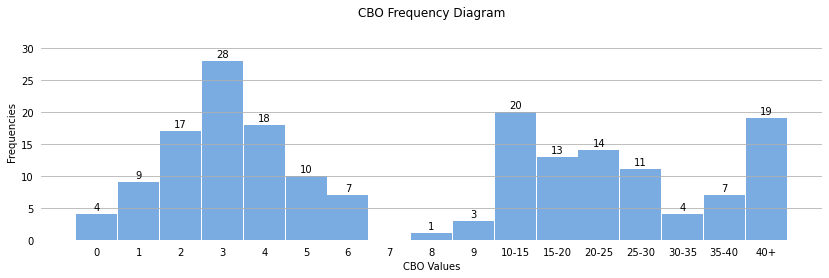

In [25]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          class_metrics_data[['CBO']].dropna().sort_values(by='CBO'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"CBO Frequency Diagram", 
          xlabel="CBO Values", ylabel="Frequencies"
         )
plt.show()

# God Class

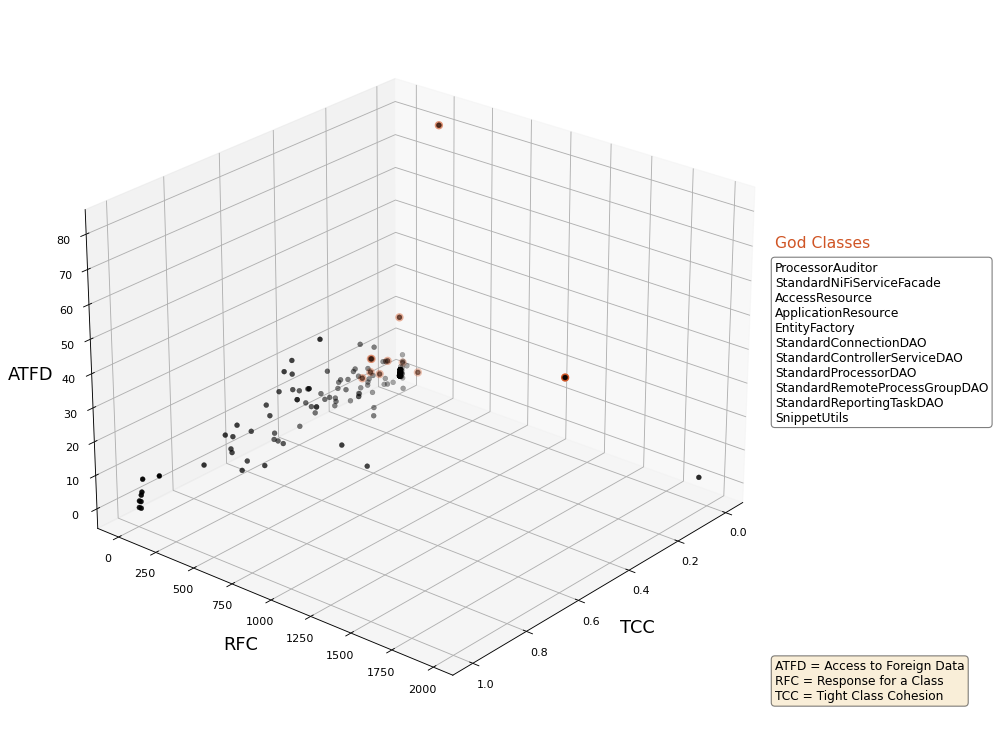

In [26]:
god_class_data = class_metrics_data[['Class Name','ATFD','TCC','RFC']]
god_class_filtered_data = god_class_data.dropna()
god_class_filtered_data

FEW_value = 5 
ONE_THIRD_value = 0.33
VERY_HIGH_value = 110

fig = plt.figure(figsize=(15, 12), dpi=80)
ax = plt.axes(projection='3d')
ax.view_init(25, 40)

# Data for three-dimensional scattered points for each categories god classes and normal classes...
filtered_god_class_data = god_class_filtered_data[(god_class_filtered_data['ATFD']>FEW_value) & (god_class_filtered_data['TCC']<ONE_THIRD_value) & (god_class_filtered_data['RFC']>=VERY_HIGH_value)]

zdata_god_class = filtered_god_class_data['ATFD'].to_numpy()
xdata_god_class = filtered_god_class_data['TCC'].to_numpy()
ydata_god_class = filtered_god_class_data['RFC'].to_numpy()
label_god_class = filtered_god_class_data['Class Name'].to_numpy()
label_god_class_filtered = [x.rsplit('.', 1)[-1] for x in label_god_class]

zdata = god_class_filtered_data['ATFD'].to_numpy()
xdata = god_class_filtered_data['TCC'].to_numpy()
ydata = god_class_filtered_data['RFC'].to_numpy()
label = god_class_filtered_data['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label]

#ax.set_title('Detection of God Class', fontsize=22, c = '#DD6E42',weight='bold')
#ax.text2D(0.40, 0.99, 'No Interface Classes!', fontsize=11,transform=ax.transAxes, verticalalignment='top')

ax.set_zlabel('ATFD', fontsize=16, labelpad=10)
ax.set_xlabel('TCC', fontsize=16, labelpad=10)
ax.set_ylabel('RFC', fontsize=16, labelpad=10)

# Text box...
text_str = '\n'.join((
    r'ATFD = Access to Foreign Data',
    r'RFC = Response for a Class',
    r'TCC = Tight Class Cohesion' 
))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text2D(1, 0.10, text_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)

# Scattering all values...
ax.scatter3D(xdata, ydata, zdata, c='black', linewidth=0.3);
ax.scatter3D(xdata_god_class, ydata_god_class, zdata_god_class, c='#D05525', linewidth=3);

if len(label_god_class_filtered) > 5:
    ax.text2D(1, 0.685, 'God Classes', fontsize=14,transform=ax.transAxes, verticalalignment='top', c='#D05525')
    label_str = "\n".join(label_god_class_filtered)
    props = dict(boxstyle='round', facecolor='none', alpha=0.5)
    ax.text2D(1, 0.65, label_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)
else:
    # Annotating each god classes points...
    for i in range(len(label_god_class_filtered)): 
        ax.text(
                xdata_god_class[i],ydata_god_class[i],zdata_god_class[i],  
                '%s' % (str(label_god_class_filtered[i])), 
                size=9, 
                zorder=2,
                color='k'
        )

plt.savefig('Detection_of_God_Class_1_15_2.png')

# Data Class

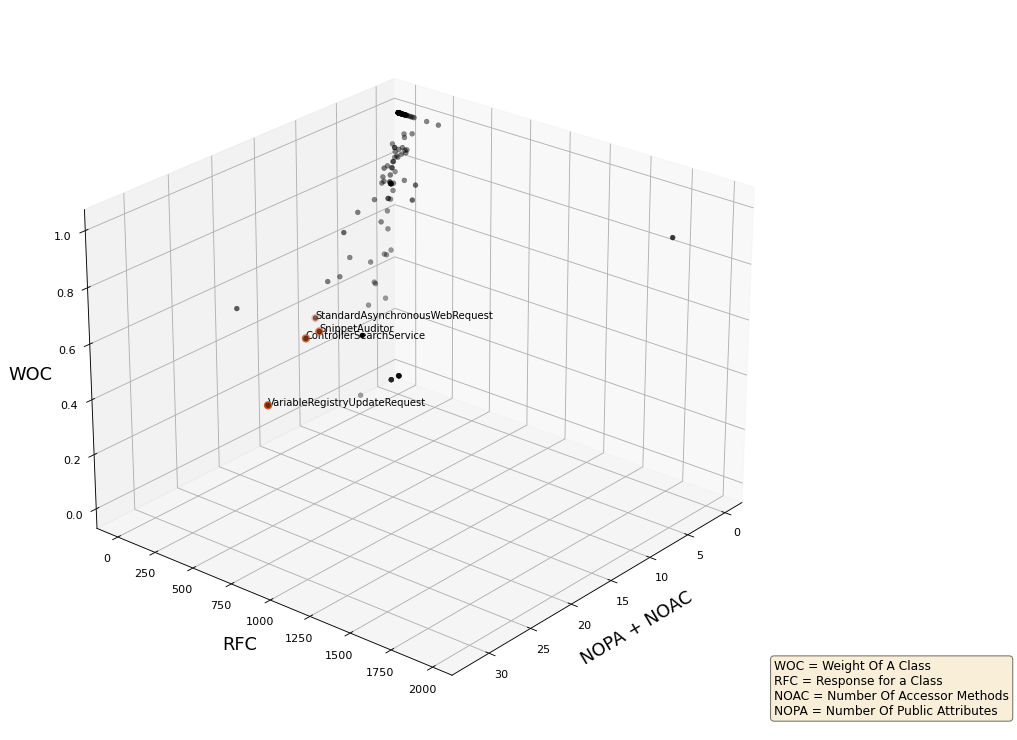

In [27]:
data_class_data = class_metrics_data[['Class Name','WOC','NOPA','NOAC','RFC']]
data_class_filtered_data = data_class_data.dropna()
data_class_filtered_data

FEW_value = 5 
MANY_value = 10

ONE_THIRD_value = 0.33

VERY_HIGH_value = 110 #47
HIGH_value = 73 #31
 

fig = plt.figure(figsize=(16, 12), dpi=80)
ax = plt.axes(projection='3d')
ax.view_init(25, 40)

# Data for three-dimensional scattered points for each categories god classes and normal classes...
filtered_data_class_data = data_class_filtered_data[(data_class_filtered_data['WOC']<ONE_THIRD_value) & (
            (data_class_filtered_data['NOPA']+data_class_filtered_data['NOAC']>FEW_value) & (data_class_filtered_data['RFC']<HIGH_value)
        ) | (
            (data_class_filtered_data['NOPA']+data_class_filtered_data['NOAC']>MANY_value) & (data_class_filtered_data['RFC']<VERY_HIGH_value)
    )]

zdata_data_class = filtered_data_class_data['WOC'].to_numpy()
xdata_data_class = filtered_data_class_data['NOPA'].to_numpy() + filtered_data_class_data['NOAC'].to_numpy()
ydata_data_class = filtered_data_class_data['RFC'].to_numpy()
label_data_class = filtered_data_class_data['Class Name'].to_numpy()

label_data_class_filtered = [x.rsplit('.', 1)[-1] for x in label_data_class]

zdata = data_class_filtered_data['WOC'].to_numpy()
xdata = data_class_filtered_data['NOPA'].to_numpy() + data_class_filtered_data['NOAC'].to_numpy()
ydata = data_class_filtered_data['RFC'].to_numpy()
label = data_class_filtered_data['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label]

#ax.set_title('Detection of Data Class', fontsize=22, c = '#DD6E42',weight='bold')
#ax.text2D(0.40, 0.99, 'No Interface Classes!', fontsize=11,transform=ax.transAxes, verticalalignment='top')

ax.set_zlabel('WOC', fontsize=16, labelpad=10)
ax.set_xlabel('NOPA + NOAC', fontsize=16, labelpad=10)
ax.set_ylabel('RFC', fontsize=16, labelpad=10)

# Text box...
text_str = '\n'.join((
    r'WOC = Weight Of A Class',
    r'RFC = Response for a Class',
    r'NOAC = Number Of Accessor Methods', 
    r'NOPA = Number Of Public Attributes' 
))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text2D(1, 0.10, text_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)

# Scattering all values...
ax.scatter3D(xdata, ydata, zdata, c='black', linewidth=0.3);
ax.scatter3D(xdata_data_class, ydata_data_class, zdata_data_class, c='#D05525', linewidth=3);

if len(label_data_class_filtered) > 5:
    ax.text2D(1, 0.685, 'Data Classes', fontsize=14,transform=ax.transAxes, verticalalignment='top', c='#D05525')
    label_str = "\n".join(label_data_class_filtered)
    props = dict(boxstyle='round', facecolor='none', alpha=0.5)
    ax.text2D(1, 0.65, label_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)
else:
    # Annotating each god classes points...
    for i in range(len(label_data_class_filtered)): 
        ax.text(
                xdata_data_class[i],ydata_data_class[i],zdata_data_class[i],  
                '%s' % (str(label_data_class_filtered[i])), 
                size=9, 
                zorder=2,
                color='k'
        )
plt.savefig('Detection_of_Data_Class_1_15_2.png')

# Update Class Features in Dataframe

In [28]:
class_metrics_data['God Class'] = [1 if x in label_god_class else 0 for x in class_metrics_data['Class Name']]
class_metrics_data['Data Class'] = [1 if x in label_data_class else 0 for x in class_metrics_data['Class Name']]
class_metrics_data

,Class Name,ATFD,CBO,DAC,DIT,LCOM,MPC,NCSS,NOAC,NOAM,...,NOM,NOO,NOOM,NOPA,RFC,TCC,WOC,WMC,God Class,Data Class
160,org.apache.nifi.aop.MethodProfiler,0.0,0.0,1.0,1.0,1.0,8.0,9.0,0.0,1.0,...,1.0,13.0,0.0,0.0,8.0,0.0000,1.0000,2.0,0,0
364,org.apache.nifi.audit.AccessPolicyAuditor,8.0,14.0,2.0,2.0,1.0,63.0,79.0,0.0,7.0,...,7.0,27.0,0.0,0.0,46.0,0.1905,1.0000,20.0,0,0
365,org.apache.nifi.audit.ComponentStateAuditor,5.0,14.0,1.0,2.0,1.0,51.0,54.0,0.0,3.0,...,3.0,23.0,0.0,0.0,28.0,1.0000,1.0000,6.0,0,0
366,org.apache.nifi.audit.ControllerAuditor,4.0,9.0,1.0,2.0,1.0,37.0,44.0,0.0,2.0,...,2.0,22.0,0.0,0.0,23.0,1.0000,1.0000,6.0,0,0
367,org.apache.nifi.audit.ControllerServiceAuditor,11.0,25.0,2.0,2.0,1.0,151.0,194.0,0.0,10.0,...,10.0,30.0,0.0,0.0,66.0,0.2222,1.0000,49.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,org.apache.nifi.web.util.InvalidComponentAction,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6424,org.apache.nifi.web.util.LifecycleManagementEx...,0.0,5.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,...,3.0,46.0,0.0,0.0,6.0,0.0000,0.0000,3.0,0,0
6425,org.apache.nifi.web.util.LocalComponentLifecycle,16.0,26.0,4.0,1.0,2.0,225.0,229.0,3.0,21.0,...,21.0,35.0,0.0,0.0,90.0,0.3381,0.8571,76.0,0,0
6427,org.apache.nifi.web.util.Pause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [29]:
class_metrics_data[class_metrics_data['God Class']==1]

,Class Name,ATFD,CBO,DAC,DIT,LCOM,MPC,NCSS,NOAC,NOAM,...,NOM,NOO,NOOM,NOPA,RFC,TCC,WOC,WMC,God Class,Data Class
373,org.apache.nifi.audit.ProcessorAuditor,14.0,26.0,2.0,2.0,1.0,193.0,231.0,0.0,8.0,...,8.0,28.0,0.0,0.0,111.0,0.1786,1.0000,62.0,1,0
5732,org.apache.nifi.web.StandardNiFiServiceFacade,33.0,348.0,36.0,1.0,1.0,3534.0,2659.0,31.0,374.0,...,374.0,652.0,0.0,1.0,1463.0,0.2382,0.9171,738.0,1,0
5743,org.apache.nifi.web.api.AccessResource,14.0,38.0,13.0,2.0,1.0,138.0,166.0,11.0,24.0,...,24.0,104.0,0.0,0.0,114.0,0.1775,0.5417,53.0,1,0
5744,org.apache.nifi.web.api.ApplicationResource,7.0,73.0,10.0,1.0,9.0,107.0,392.0,6.0,68.0,...,68.0,80.0,0.0,0.0,226.0,0.0579,0.9118,146.0,1,0
5871,org.apache.nifi.web.api.dto.EntityFactory,81.0,106.0,0.0,1.0,45.0,388.0,462.0,0.0,47.0,...,47.0,59.0,0.0,0.0,271.0,0.0009,1.0000,137.0,1,0
6214,org.apache.nifi.web.dao.impl.StandardConnectio...,9.0,39.0,3.0,2.0,1.0,311.0,372.0,2.0,25.0,...,25.0,59.0,0.0,0.0,138.0,0.1600,0.9200,120.0,1,0
6215,org.apache.nifi.web.dao.impl.StandardControlle...,10.0,35.0,3.0,2.0,2.0,182.0,209.0,3.0,25.0,...,25.0,57.0,0.0,0.0,128.0,0.2233,0.8800,70.0,1,0
6223,org.apache.nifi.web.dao.impl.StandardProcessorDAO,13.0,49.0,3.0,2.0,2.0,292.0,309.0,2.0,24.0,...,24.0,56.0,0.0,0.0,167.0,0.1449,0.9167,105.0,1,0
6224,org.apache.nifi.web.dao.impl.StandardRemotePro...,8.0,25.0,2.0,2.0,1.0,232.0,237.0,2.0,22.0,...,22.0,51.0,0.0,0.0,113.0,0.0519,0.9091,93.0,1,0
6225,org.apache.nifi.web.dao.impl.StandardReporting...,10.0,33.0,4.0,2.0,2.0,159.0,185.0,4.0,24.0,...,24.0,54.0,0.0,0.0,112.0,0.1812,0.8333,67.0,1,0


In [30]:
class_metrics_data[class_metrics_data['Data Class']==1]

,Class Name,ATFD,CBO,DAC,DIT,LCOM,MPC,NCSS,NOAC,NOAM,...,NOM,NOO,NOOM,NOPA,RFC,TCC,WOC,WMC,God Class,Data Class
378,org.apache.nifi.audit.SnippetAuditor,17.0,42.0,12.0,2.0,1.0,187.0,234.0,12.0,19.0,...,19.0,39.0,0.0,0.0,108.0,0.1637,0.3684,72.0,0,1
4391,org.apache.nifi.registry.variable.VariableRegi...,0.0,6.0,7.0,1.0,14.0,7.0,25.0,17.0,20.0,...,21.0,33.0,0.0,0.0,31.0,0.0421,0.1500,21.0,0,1
5788,org.apache.nifi.web.api.concurrent.StandardAsy...,0.0,8.0,7.0,1.0,5.0,19.0,50.0,11.0,18.0,...,19.0,48.0,0.0,0.0,28.0,0.1242,0.3889,27.0,0,1
6191,org.apache.nifi.web.controller.ControllerSearc...,2.0,24.0,5.0,1.0,1.0,87.0,53.0,13.0,20.0,...,20.0,32.0,0.0,0.0,72.0,0.0895,0.3500,28.0,0,1


# Load Method Metrics Data

In [31]:
import xml.etree.ElementTree as ET

tree = ET.parse('./Metrics/nifi-1.15.2/nifi-1.15.2.xml')
root = tree.getroot()

def load_method_metrics(node, class_list):
    node_attr = node.attrib
    
    for class_node in node.iter('Class'):
        if class_node.attrib['name'] in class_list:
            for doc in class_node.iter('Method'):
                doc_dict = node_attr.copy()
                doc_dict.update(doc.attrib)

                doc_dict['Class Name'] = class_node.attrib['name']
                doc_dict['CND'] = doc[0][0].attrib['value']
                doc_dict['CDISP'] = doc[0][1].attrib['value']
                doc_dict['CINT'] = doc[0][2].attrib['value']
                doc_dict['FDP'] = doc[0][3].attrib['value']
                doc_dict['LOC'] = doc[0][4].attrib['value']
                doc_dict['LAA'] = doc[0][5].attrib['value']
                doc_dict['LND'] = doc[0][6].attrib['value']
                doc_dict['MND'] = doc[0][7].attrib['value']
                doc_dict['CC'] = doc[0][8].attrib['value']
                doc_dict['NOAV'] = doc[0][9].attrib['value']
                doc_dict['NOL'] = doc[0][10].attrib['value']
                doc_dict['NOPM'] = doc[0][11].attrib['value']
                
                yield doc_dict

In [32]:
label_class = class_metrics_data.dropna()['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label_class]

In [33]:
labels = label_filtered
method_metrics_data = pd.DataFrame(list(load_method_metrics(tree.getroot(), labels)))
method_metrics_data = method_metrics_data.rename(columns = {'name':'Method Name'})
method_metrics_data

,Method Name,Class Name,CND,CDISP,CINT,FDP,LOC,LAA,LND,MND,CC,NOAV,NOL,NOPM
0,profileMethod(ProceedingJoinPoint),MethodProfiler,1,0.8333,6,0,13,1.0,0,2,2,6,0,1
1,createAccessPolicyAdvice(ProceedingJoinPoint),AccessPolicyAuditor,1,0.6667,2,1,23,0.5,0,1,2,5,0,1
2,"extractConfiguredPropertyValues(AccessPolicy, ...",AccessPolicyAuditor,1,0.75,8,3,21,0.2857,0,1,3,8,0,2
3,formatPolicyName(AccessPolicy),AccessPolicyAuditor,0,0.6667,3,1,9,0.0,0,0,1,1,0,1
4,"generateAuditRecord(AccessPolicy, Operation)",AccessPolicyAuditor,0,0.0,0,0,10,0.0,0,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,setReportingTaskProvider(ReportingTaskProvider),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1
2123,setRequestReplicator(RequestReplicator),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1
2124,setServiceFacade(NiFiServiceFacade),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1
2125,setVariableRegistry(VariableRegistry),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1


In [34]:
len(method_metrics_data.dropna())

2127

In [35]:
method_metrics_data['God Class'] = [1 if x in label_god_class_filtered else 0 for x in method_metrics_data['Class Name']]
method_metrics_data['Data Class'] = [1 if x in label_data_class_filtered else 0 for x in method_metrics_data['Class Name']]
method_metrics_data

,Method Name,Class Name,CND,CDISP,CINT,FDP,LOC,LAA,LND,MND,CC,NOAV,NOL,NOPM,God Class,Data Class
0,profileMethod(ProceedingJoinPoint),MethodProfiler,1,0.8333,6,0,13,1.0,0,2,2,6,0,1,0,0
1,createAccessPolicyAdvice(ProceedingJoinPoint),AccessPolicyAuditor,1,0.6667,2,1,23,0.5,0,1,2,5,0,1,0,0
2,"extractConfiguredPropertyValues(AccessPolicy, ...",AccessPolicyAuditor,1,0.75,8,3,21,0.2857,0,1,3,8,0,2,0,0
3,formatPolicyName(AccessPolicy),AccessPolicyAuditor,0,0.6667,3,1,9,0.0,0,0,1,1,0,1,0,0
4,"generateAuditRecord(AccessPolicy, Operation)",AccessPolicyAuditor,0,0.0,0,0,10,0.0,0,0,1,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,setReportingTaskProvider(ReportingTaskProvider),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1,0,0
2123,setRequestReplicator(RequestReplicator),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1,0,0
2124,setServiceFacade(NiFiServiceFacade),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1,0,0
2125,setVariableRegistry(VariableRegistry),StandardNiFiWebConfigurationContext,0,0.0,0,0,3,1.0,0,0,1,2,0,1,0,0


In [36]:
method_metrics_data = method_metrics_data.replace('N/A',0)

for i in method_metrics_data.columns:
    try:
        method_metrics_data[[i]] = method_metrics_data[[i]].astype(float)
    except:
        pass

method_metrics_data

,Method Name,Class Name,CND,CDISP,CINT,FDP,LOC,LAA,LND,MND,CC,NOAV,NOL,NOPM,God Class,Data Class
0,profileMethod(ProceedingJoinPoint),MethodProfiler,1.0,0.8333,6.0,0.0,13.0,1.0000,0.0,2.0,2.0,6.0,0.0,1.0,0.0,0.0
1,createAccessPolicyAdvice(ProceedingJoinPoint),AccessPolicyAuditor,1.0,0.6667,2.0,1.0,23.0,0.5000,0.0,1.0,2.0,5.0,0.0,1.0,0.0,0.0
2,"extractConfiguredPropertyValues(AccessPolicy, ...",AccessPolicyAuditor,1.0,0.7500,8.0,3.0,21.0,0.2857,0.0,1.0,3.0,8.0,0.0,2.0,0.0,0.0
3,formatPolicyName(AccessPolicy),AccessPolicyAuditor,0.0,0.6667,3.0,1.0,9.0,0.0000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,"generateAuditRecord(AccessPolicy, Operation)",AccessPolicyAuditor,0.0,0.0000,0.0,0.0,10.0,0.0000,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,setReportingTaskProvider(ReportingTaskProvider),StandardNiFiWebConfigurationContext,0.0,0.0000,0.0,0.0,3.0,1.0000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
2123,setRequestReplicator(RequestReplicator),StandardNiFiWebConfigurationContext,0.0,0.0000,0.0,0.0,3.0,1.0000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
2124,setServiceFacade(NiFiServiceFacade),StandardNiFiWebConfigurationContext,0.0,0.0000,0.0,0.0,3.0,1.0000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
2125,setVariableRegistry(VariableRegistry),StandardNiFiWebConfigurationContext,0.0,0.0000,0.0,0.0,3.0,1.0000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0


# Correlation Matrix of Method Metrics

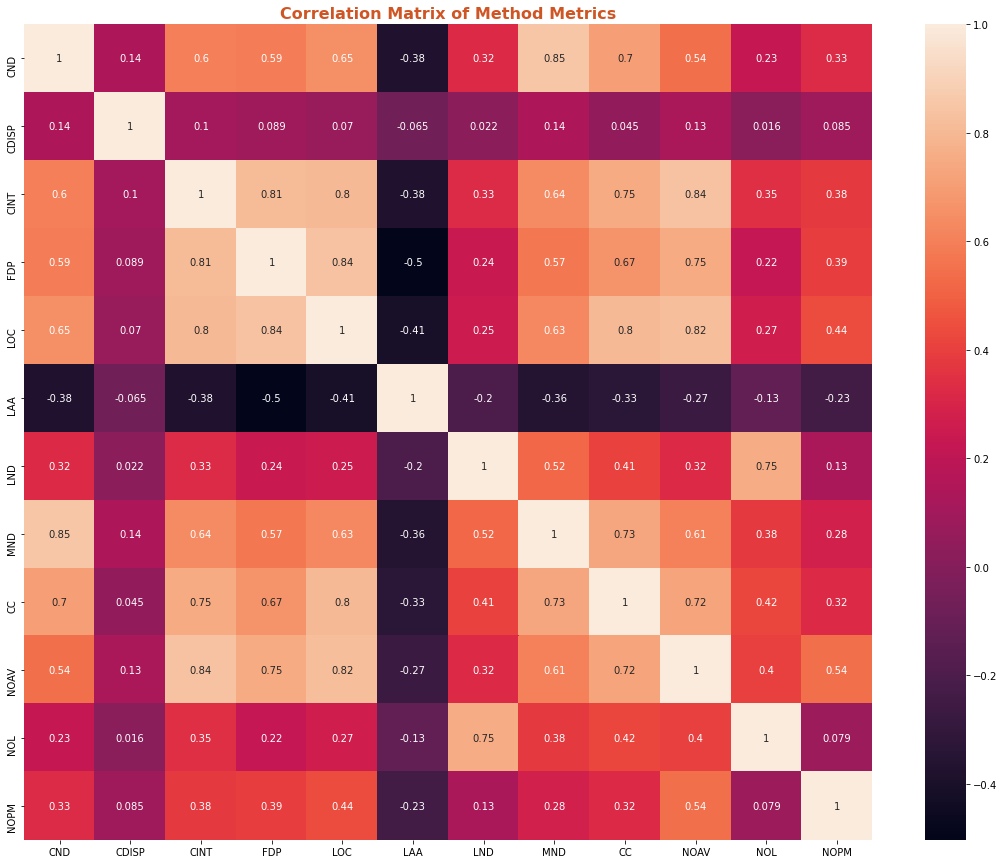

In [37]:
f = plt.figure(figsize=(19, 15))
corr_matrix = method_metrics_data[['CND','CDISP','CINT','FDP','LOC','LAA','LND','MND','CC','NOAV','NOL','NOPM']].corr()

sn.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix of Method Metrics', fontsize=16, c='#D05525',weight='bold');
plt.show()

# Statistical Threshold Values

In [38]:
def ratio_scale_statistical_values(l):
    avg = statistics.mean(l)
    stdev = statistics.stdev(l)
    low = avg - stdev
    high = avg + stdev
    very_high = (avg + stdev)*1.5
    return low,avg,high,very_high
    
def ordinal_scale_statistical_values(l):    
    lower_quartile = np.percentile(l, 25)
    median = np.percentile(l, 50)
    upper_quartile = np.percentile(l, 75)
    IQR = upper_quartile - lower_quartile
    lower_tail = lower_quartile - (1.5*IQR)
    upper_tail = upper_quartile + (1.5*IQR)
    return lower_tail, lower_quartile, median, upper_quartile, upper_tail

shallow_value = 2 #1-2
few_value = 5 #2-5
short_memory_capacity_value = 7 #7-8
many_value = 10

quarter_value = 0.25
one_third_value = 0.33
half_value = 0.5

In [39]:
method_metrics_statistics_data = method_metrics_data[['CND','CDISP','CINT','FDP','LOC','LAA','LND','MND','CC','NOAV','NOL','NOPM']]

print('\033[1mRatio Scale Statistical Values')
print('\t  Lower Tail\t Lower Quartile\t Median\t\t Upper Quartile\t Upper Tail\033[0m')
for i in range(9):
    lower_tail, lower_quartile, median, upper_quartile, upper_tail = ordinal_scale_statistical_values(method_metrics_statistics_data.dropna().iloc[:, i].to_list())
    print(method_metrics_statistics_data.columns[i]," \t: ->", round(lower_tail, 2)," \t ->", round(lower_quartile, 2)," \t ->", round(median, 2)," \t ->", round(upper_quartile, 2)," \t ->", round(upper_tail, 2))

print('\n\033[1mOrdinal Scale Statistical Values')
print('\t  Low\t\t Avarage\t High\t\t Very High\033[0m')
for i in range(9):
    low,avg,high,very_high = ratio_scale_statistical_values(method_metrics_statistics_data.dropna().iloc[:, i].to_list())
    print(method_metrics_statistics_data.columns[i]," \t: ->", round(low, 2)," \t ->", round(avg, 2)," \t ->", round(high, 2)," \t ->", round(very_high, 2))

Ratio Scale Statistical Values
	  Lower Tail	 Lower Quartile	 Median		 Upper Quartile	 Upper Tail
CND  	: -> -1.5  	 -> 0.0  	 -> 0.0  	 -> 1.0  	 -> 2.5
CDISP  	: -> -0.37  	 -> 0.3  	 -> 0.56  	 -> 0.75  	 -> 1.42
CINT  	: -> -11.0  	 -> 1.0  	 -> 3.0  	 -> 9.0  	 -> 21.0
FDP  	: -> -3.0  	 -> 0.0  	 -> 0.0  	 -> 2.0  	 -> 5.0
LOC  	: -> -23.75  	 -> 4.0  	 -> 9.0  	 -> 22.5  	 -> 50.25
LAA  	: -> -1.5  	 -> 0.0  	 -> 0.5  	 -> 1.0  	 -> 2.5
LND  	: -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0  	 -> 0.0
MND  	: -> -1.5  	 -> 0.0  	 -> 0.0  	 -> 1.0  	 -> 2.5
CC  	: -> -2.0  	 -> 1.0  	 -> 1.0  	 -> 3.0  	 -> 6.0

Ordinal Scale Statistical Values
	  Low		 Avarage	 High		 Very High
CND  	: -> -0.23  	 -> 0.5  	 -> 1.24  	 -> 1.85
CDISP  	: -> 0.17  	 -> 0.52  	 -> 0.87  	 -> 1.31
CINT  	: -> -2.05  	 -> 6.38  	 -> 14.81  	 -> 22.22
FDP  	: -> -0.74  	 -> 1.41  	 -> 3.56  	 -> 5.34
LOC  	: -> -5.1  	 -> 18.48  	 -> 42.05  	 -> 63.08
LAA  	: -> 0.08  	 -> 0.51  	 -> 0.94  	 -> 1.41
LND  	: -> -0

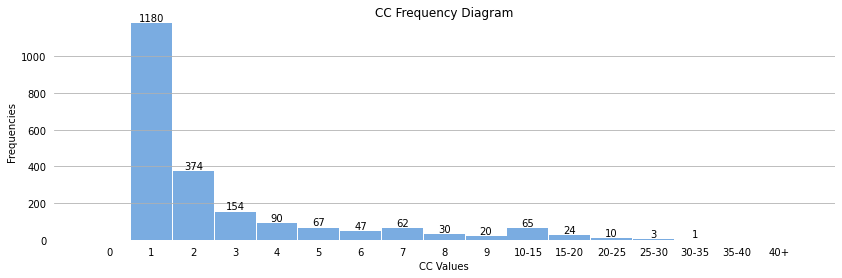

In [40]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          method_metrics_data[['CC']].dropna().sort_values(by='CC'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"CC Frequency Diagram", 
          xlabel="CC Values", ylabel="Frequencies"
         )
plt.show()

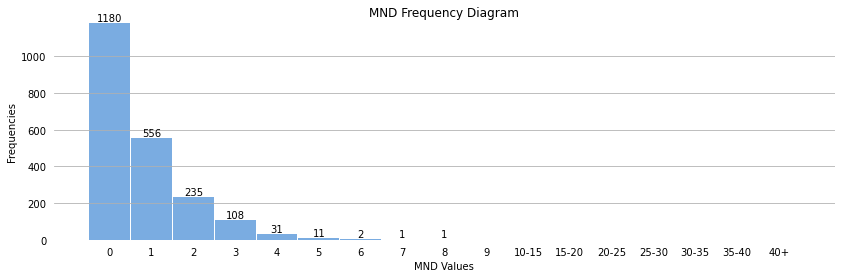

In [41]:
fig, ax = plt.subplots(figsize=(14,4))
make_hist(ax, 
          method_metrics_data[['MND']].dropna().sort_values(by='MND'), 
          bins=list(range(10))+list(range(10,41,5))+[np.inf], 
          width=0.98,
          extra_y=6,
          title=r"MND Frequency Diagram", 
          xlabel="MND Values", ylabel="Frequencies"
         )
plt.show()

# Brain Method

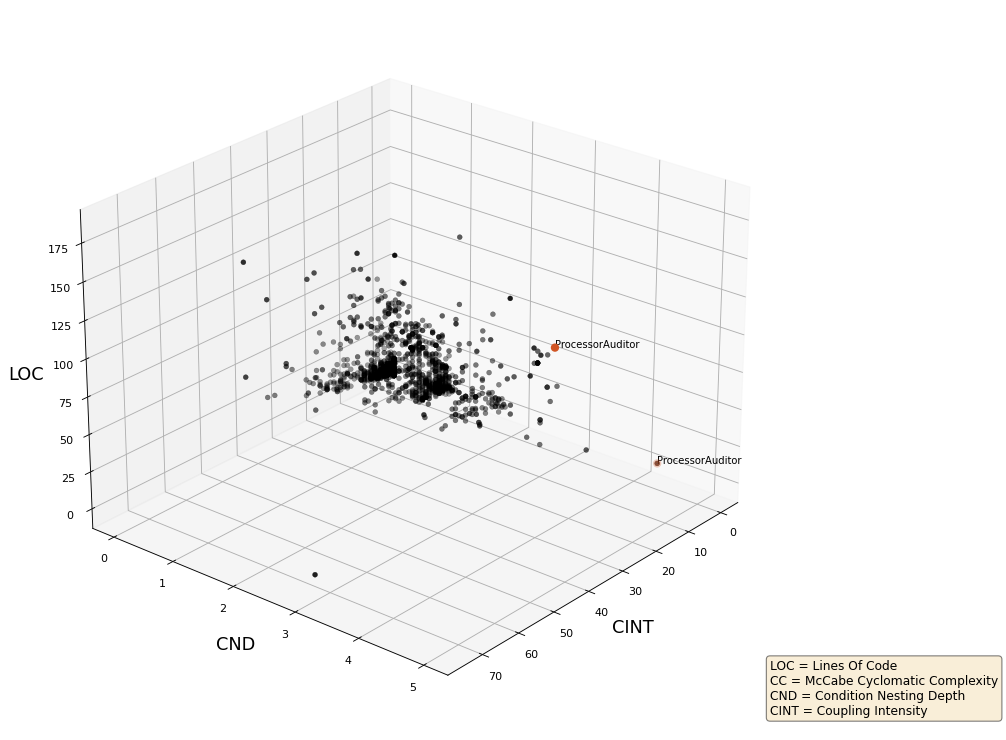

In [42]:
brain_method_data = method_metrics_data[['Method Name','Class Name','LOC','CC','CND','CINT']]
brain_method_filtered_data = brain_method_data.dropna()
brain_method_filtered_data

SEVERAL_value = 5
FEW_value = 5 
MANY_value = 10

ONE_THIRD_value = 0.33

VERY_HIGH_value = 64 #47
HIGH_value = 25 #31
 

fig = plt.figure(figsize=(17, 12), dpi=80)
ax = plt.axes(projection='3d')
ax.view_init(25, 40)

# Data for three-dimensional scattered points for each categories god classes and normal classes...
filtered_brain_method_data = brain_method_filtered_data[(brain_method_filtered_data['LOC']>HIGH_value/2) & (
                brain_method_filtered_data['CC']>=5.46) & (
                brain_method_filtered_data['CND']>=SEVERAL_value) & (
                brain_method_filtered_data['CINT']>MANY_value)
                                                       ]

zdata_brain_method = filtered_brain_method_data['LOC'].to_numpy()
xdata_brain_method = filtered_brain_method_data['CINT'].to_numpy()
ydata_brain_method = filtered_brain_method_data['CND'].to_numpy()
label_brain_method = filtered_brain_method_data['Class Name'].to_numpy()

label_brain_method_filtered = [x.rsplit('.', 1)[-1] for x in label_brain_method]

zdata = brain_method_filtered_data['LOC'].to_numpy()
xdata = brain_method_filtered_data['CINT'].to_numpy()
ydata = brain_method_filtered_data['CND'].to_numpy()
label = brain_method_filtered_data['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label]

#ax.set_title('Detection of Brain Method', fontsize=22, c = '#DD6E42',weight='bold')
#ax.text2D(0.40, 0.99, 'No Interface Classes!', fontsize=11,transform=ax.transAxes, verticalalignment='top')

ax.set_zlabel('LOC', fontsize=16, labelpad=10)
ax.set_xlabel('CINT', fontsize=16, labelpad=10)
ax.set_ylabel('CND', fontsize=16, labelpad=10)

# Text box...
text_str = '\n'.join((
    r'LOC = Lines Of Code',
    r'CC = McCabe Cyclomatic Complexity',
    r'CND = Condition Nesting Depth', 
    r'CINT = Coupling Intensity' 
))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text2D(1, 0.10, text_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)

# Scattering all values...
ax.scatter3D(xdata, ydata, zdata, c='black', linewidth=0.3);
ax.scatter3D(xdata_brain_method, ydata_brain_method, zdata_brain_method, c='#D05525', linewidth=3);

if len(label_brain_method_filtered) > 5:
    ax.text2D(1, 0.685, 'Classes with Brain Methods', fontsize=14,transform=ax.transAxes, verticalalignment='top', c='#D05525')
    label_str = "\n".join(label_brain_method_filtered)
    props = dict(boxstyle='round', facecolor='none', alpha=0.5)
    ax.text2D(1, 0.65, label_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)
else:
    # Annotating each god classes points...
    for i in range(len(label_brain_method_filtered)): 
        ax.text(
                xdata_brain_method[i],ydata_brain_method[i],zdata_brain_method[i],  
                '%s' % (str(label_brain_method_filtered[i])), 
                size=9, 
                zorder=2,
                color='k'
        )
plt.savefig('Detection_of_Brain_Method_1_15_2.png')

# Intensive Coupling

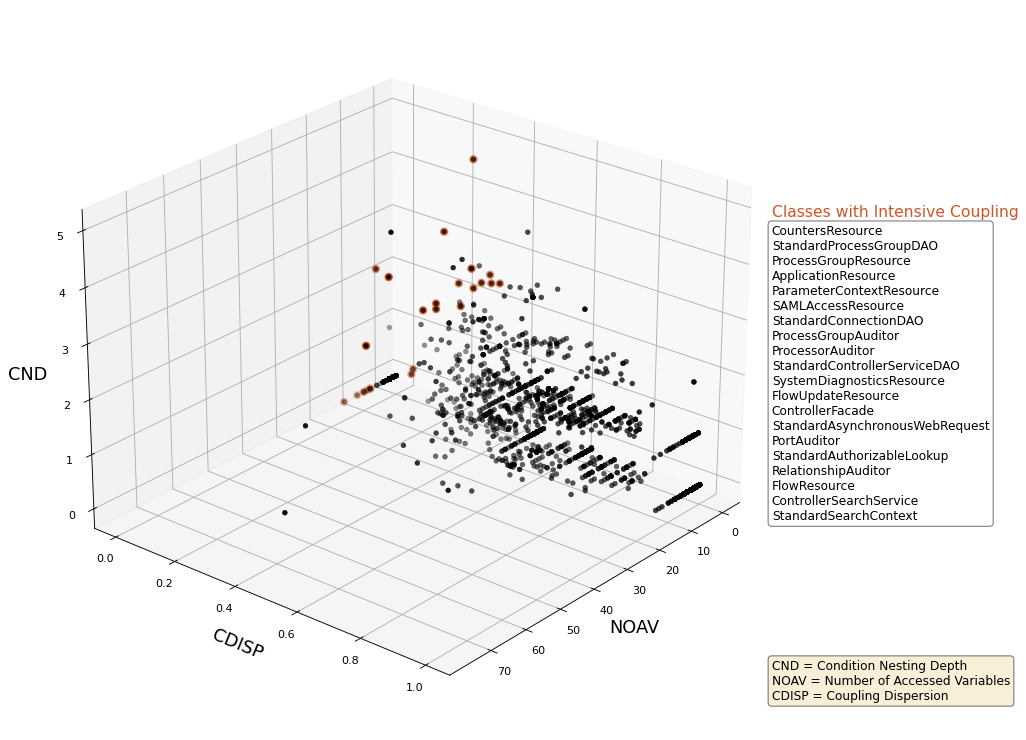

In [43]:
intensive_coupling_data = method_metrics_data[['Method Name','Class Name','CND','NOAV','CDISP']]
intensive_coupling_filtered_data = intensive_coupling_data.dropna()
intensive_coupling_filtered_data

SHALLOW_value = 2
SEVERAL_value = 5
FEW_value = 7
MANY_value = 10
SHORT_MEM_CAP_value = 7

QUARTER_value = 0.25
ONE_THIRD_value = 0.33
HALF_value = 0.5

VERY_HIGH_value = 64 #47
HIGH_value = 98 #31
 

fig = plt.figure(figsize=(17, 12), dpi=80)
ax = plt.axes(projection='3d')
ax.view_init(25, 40)

# Data for three-dimensional scattered points for each categories god classes and normal classes...
filtered_intensive_coupling_data = intensive_coupling_filtered_data[(intensive_coupling_filtered_data['CND']>SHALLOW_value) & (
            (intensive_coupling_filtered_data['NOAV']>SHORT_MEM_CAP_value) & (intensive_coupling_filtered_data['CDISP']<HALF_value)
        ) | (
            (intensive_coupling_filtered_data['NOAV']>FEW_value) & (intensive_coupling_filtered_data['CDISP']<QUARTER_value)
    )]



zdata_intensive_coupling = filtered_intensive_coupling_data['CND'].to_numpy()
xdata_intensive_coupling = filtered_intensive_coupling_data['NOAV'].to_numpy()
ydata_intensive_coupling = filtered_intensive_coupling_data['CDISP'].to_numpy()
label_intensive_coupling = filtered_intensive_coupling_data['Class Name'].to_numpy()

label_intensive_coupling_filtered = [x.rsplit('.', 1)[-1] for x in label_intensive_coupling]

zdata = intensive_coupling_filtered_data['CND'].to_numpy()
xdata = intensive_coupling_filtered_data['NOAV'].to_numpy()
ydata = intensive_coupling_filtered_data['CDISP'].to_numpy()
label = intensive_coupling_filtered_data['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label]

#ax.set_title('Detection of Intensive Coupling', fontsize=22, c = '#DD6E42',weight='bold')
#ax.text2D(0.40, 0.99, 'No Interface Classes!', fontsize=11,transform=ax.transAxes, verticalalignment='top')

ax.set_zlabel('CND', fontsize=16, labelpad=10)
ax.set_xlabel('NOAV', fontsize=16, labelpad=10)
ax.set_ylabel('CDISP', fontsize=16, labelpad=10)

# Text box...
text_str = '\n'.join((
    r'CND = Condition Nesting Depth',
    r'NOAV = Number of Accessed Variables',
    r'CDISP = Coupling Dispersion'
))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text2D(1, 0.10, text_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)

# Scattering all values...
ax.scatter3D(xdata, ydata, zdata, c='black', linewidth=0.3);
ax.scatter3D(xdata_intensive_coupling, ydata_intensive_coupling, zdata_intensive_coupling, c='#D05525', linewidth=3);

if len(label_intensive_coupling_filtered) > 5:
    ax.text2D(1, 0.7285, 'Classes with Intensive Coupling', fontsize=14,transform=ax.transAxes, verticalalignment='top', c='#D05525')
    label_str = "\n".join(list(set(label_intensive_coupling_filtered)))
    props = dict(boxstyle='round', facecolor='none', alpha=0.5)
    ax.text2D(1, 0.70, label_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)
else:
    # Annotating each god classes points...
    for i in range(len(label_intensive_coupling_filtered)): 
        ax.text(
                xdata_intensive_coupling[i],ydata_intensive_coupling[i],zdata_intensive_coupling[i],  
                '%s' % (str(label_intensive_coupling_filtered[i])), 
                size=9, 
                zorder=2,
                color='k'
        )
plt.savefig('Detection_of_Intensive_Coupling_1_15_2.png')

# Dispersed Coupling

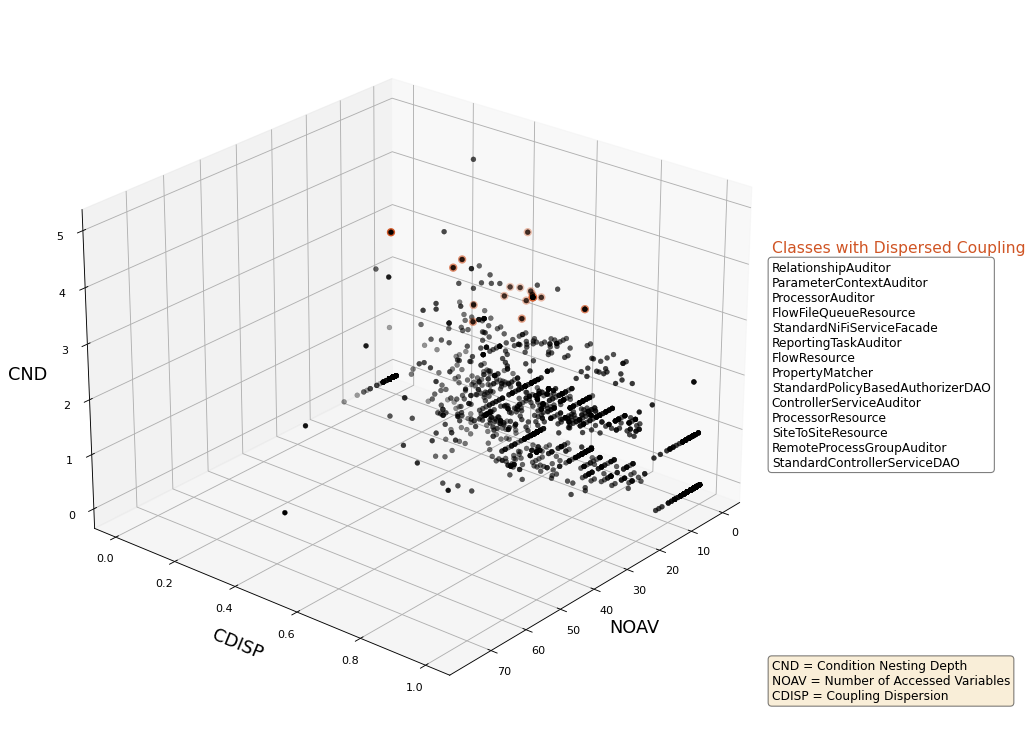

In [44]:
dispersed_coupling_data = method_metrics_data[['Method Name','Class Name','CND','NOAV','CDISP']]
dispersed_coupling_filtered_data = dispersed_coupling_data.dropna()
dispersed_coupling_filtered_data

SHALLOW_value = 2
SEVERAL_value = 5
FEW_value = 7
MANY_value = 10
SHORT_MEM_CAP_value = 7

QUARTER_value = 0.25
ONE_THIRD_value = 0.33
HALF_value = 0.5

VERY_HIGH_value = 64 #47
HIGH_value = 98 #31
 

fig = plt.figure(figsize=(17, 12), dpi=80)
ax = plt.axes(projection='3d')
ax.view_init(25, 40)

# Data for three-dimensional scattered points for each categories god classes and normal classes...
filtered_dispersed_coupling_data = dispersed_coupling_filtered_data[(dispersed_coupling_filtered_data['CND']>SHALLOW_value) & (
            (dispersed_coupling_filtered_data['NOAV']>SHORT_MEM_CAP_value) & (dispersed_coupling_filtered_data['CDISP']>=HALF_value)
        )]



zdata_dispersed_coupling = filtered_dispersed_coupling_data['CND'].to_numpy()
xdata_dispersed_coupling = filtered_dispersed_coupling_data['NOAV'].to_numpy()
ydata_dispersed_coupling = filtered_dispersed_coupling_data['CDISP'].to_numpy()
label_dispersed_coupling = filtered_dispersed_coupling_data['Class Name'].to_numpy()

label_dispersed_coupling_filtered = [x.rsplit('.', 1)[-1] for x in label_dispersed_coupling]

zdata = dispersed_coupling_filtered_data['CND'].to_numpy()
xdata = dispersed_coupling_filtered_data['NOAV'].to_numpy()
ydata = dispersed_coupling_filtered_data['CDISP'].to_numpy()
label = dispersed_coupling_filtered_data['Class Name'].to_numpy()
label_filtered = [x.rsplit('.', 1)[-1] for x in label]

#ax.set_title('Detection of Dispersed Coupling', fontsize=22, c = '#DD6E42',weight='bold')
#ax.text2D(0.40, 0.99, 'No Interface Classes!', fontsize=11,transform=ax.transAxes, verticalalignment='top')

ax.set_zlabel('CND', fontsize=16, labelpad=10)
ax.set_xlabel('NOAV', fontsize=16, labelpad=10)
ax.set_ylabel('CDISP', fontsize=16, labelpad=10)

# Text box...
text_str = '\n'.join((
    r'CND = Condition Nesting Depth',
    r'NOAV = Number of Accessed Variables',
    r'CDISP = Coupling Dispersion'
))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text2D(1, 0.10, text_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)

# Scattering all values...
ax.scatter3D(xdata, ydata, zdata, c='black', linewidth=0.3);
ax.scatter3D(xdata_dispersed_coupling, ydata_dispersed_coupling, zdata_dispersed_coupling, c='#D05525', linewidth=3);

if len(label_dispersed_coupling_filtered) > 5:
    ax.text2D(1, 0.6785, 'Classes with Dispersed Coupling', fontsize=14,transform=ax.transAxes, verticalalignment='top', c='#D05525')
    label_str = "\n".join(list(set(label_dispersed_coupling_filtered)))
    props = dict(boxstyle='round', facecolor='none', alpha=0.5)
    ax.text2D(1, 0.65, label_str, fontsize=11,transform=ax.transAxes, verticalalignment='top', bbox=props)
else:
    # Annotating each god classes points...
    for i in range(len(label_dispersed_coupling_filtered)): 
        ax.text(
                xdata_dispersed_coupling[i],ydata_dispersed_coupling[i],zdata_dispersed_coupling[i],  
                '%s' % (str(label_dispersed_coupling_filtered[i])), 
                size=9, 
                zorder=2,
                color='k'
        )
plt.savefig('Detection_of_Dispersed_Coupling_1_15_2.png')